In [2]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


## Step-1: Reading and Understanding the data

In [3]:
# Read the data from csv file
bike=pd.read_csv("./day.csv")

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Let's remove the unnecessary columns from the DataFrame. We can drop "instant" since it's just an index for the rows, and 
# "dteday" can be substituted with separate columns for year and month. 
# Also, "casual" and "registered" appear to represent breakdowns of the "cnt" column by category.

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# renaming the columns for better visibility
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

In [11]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# mapping the season column

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [13]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# mapping the month column

bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [15]:
# mapping the weekday column

bike.weekday = bike.weekday.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})

In [16]:
# Encoding/mapping the weathersit column

bike.weathersit = bike.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

In [17]:
bike

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,saturday,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thursday,1,misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,friday,1,misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,saturday,0,misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sunday,0,clear,10.489153,11.58500,48.3333,23.500518,1796


In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Observations from dataset:
1. There are no missing values in the dataset.
2. Removed unnecessary columns from the dataset.instant is just a record index, this column can be removed.
   dteday is date column and we already have month and year columns in dataframe. thus we can drop dteday columnas it not        bringing any new information.addition of casual and registered columns gives cnt column, and we will not going to get much information from these columns, thus we wil drop these two as well.
3. count column is the target variable.

### Exploratory Data Analysis

In [19]:
# visualising the dataset
# function to create barplot related to categorical columns

def plot_categorical_columns(column):
    plt.figure(figsize = (16,6))
    plt.subplot(1,2,1)
    sns.barplot(x=bike[column],y=bike['count'])
    plt.subplot(1,2,2)
    sns.barplot(x=bike[column],y=bike['count'],data=bike, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()


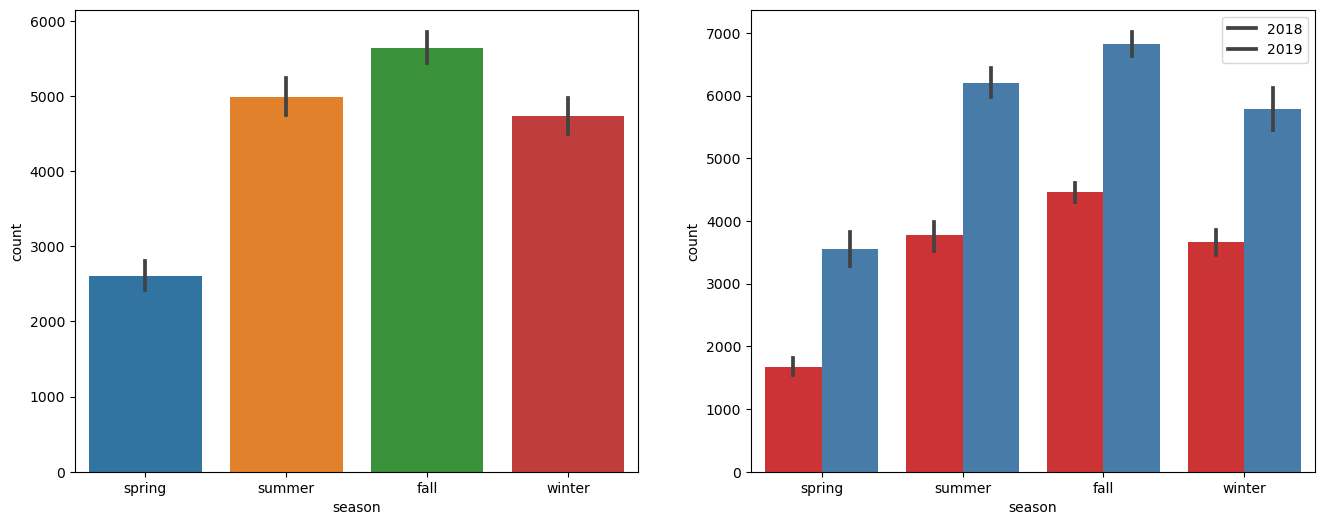

In [20]:
plot_categorical_columns('season')

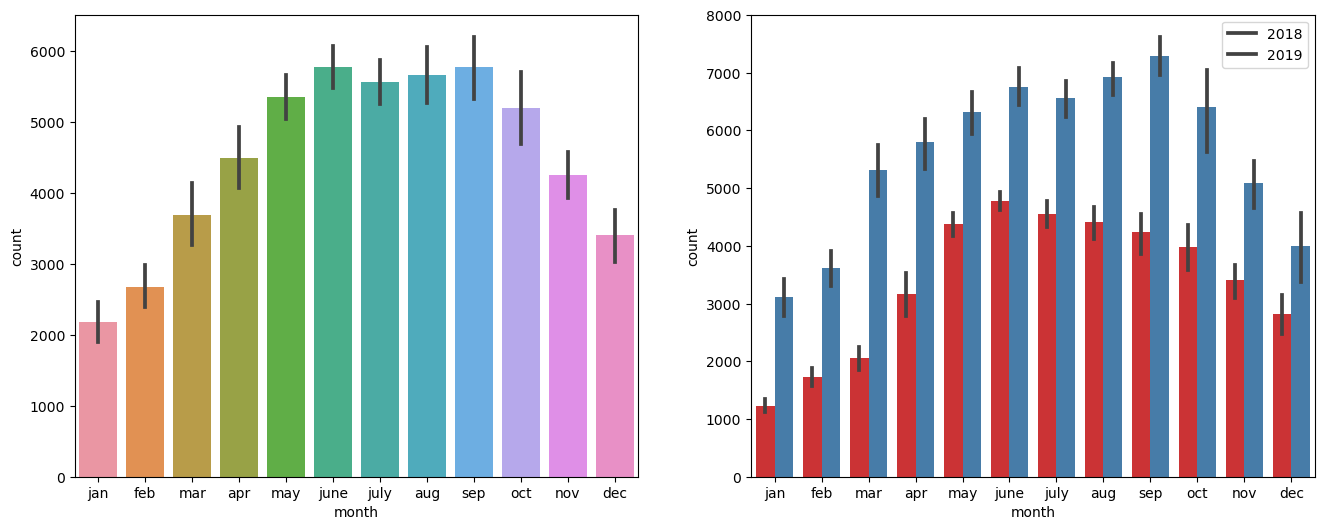

In [21]:
plot_categorical_columns('month')

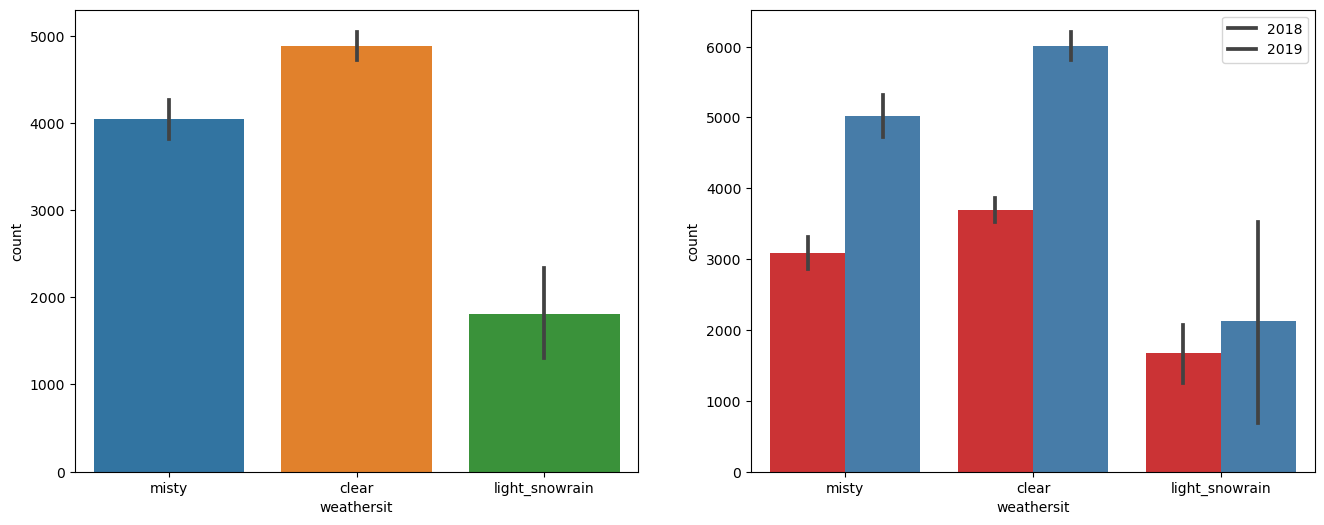

In [22]:
plot_categorical_columns('weathersit')

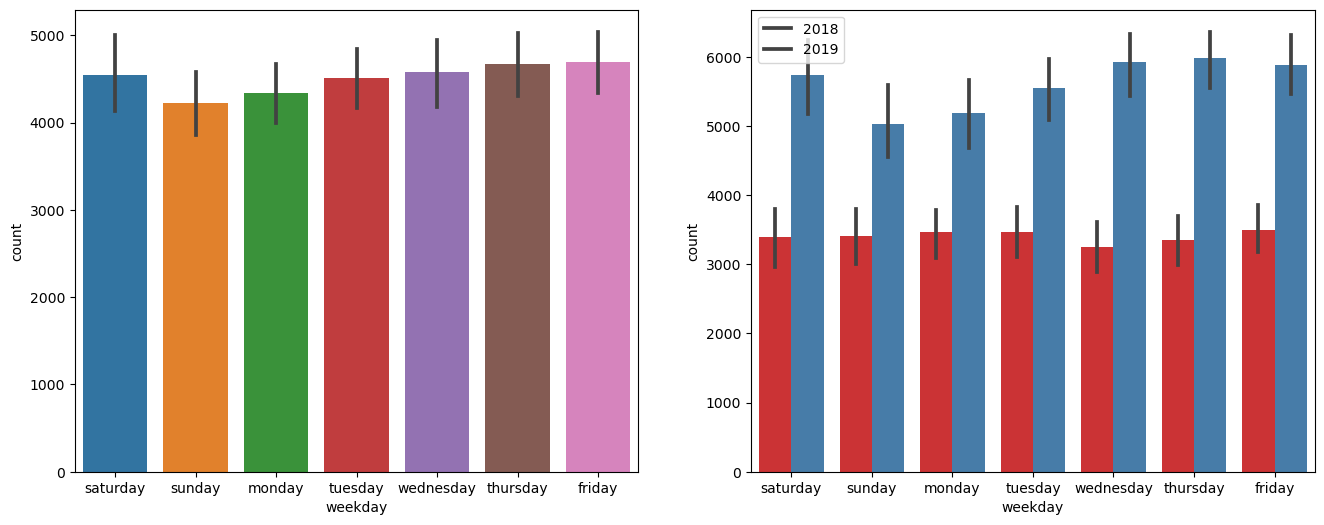

In [23]:
plot_categorical_columns('weekday')

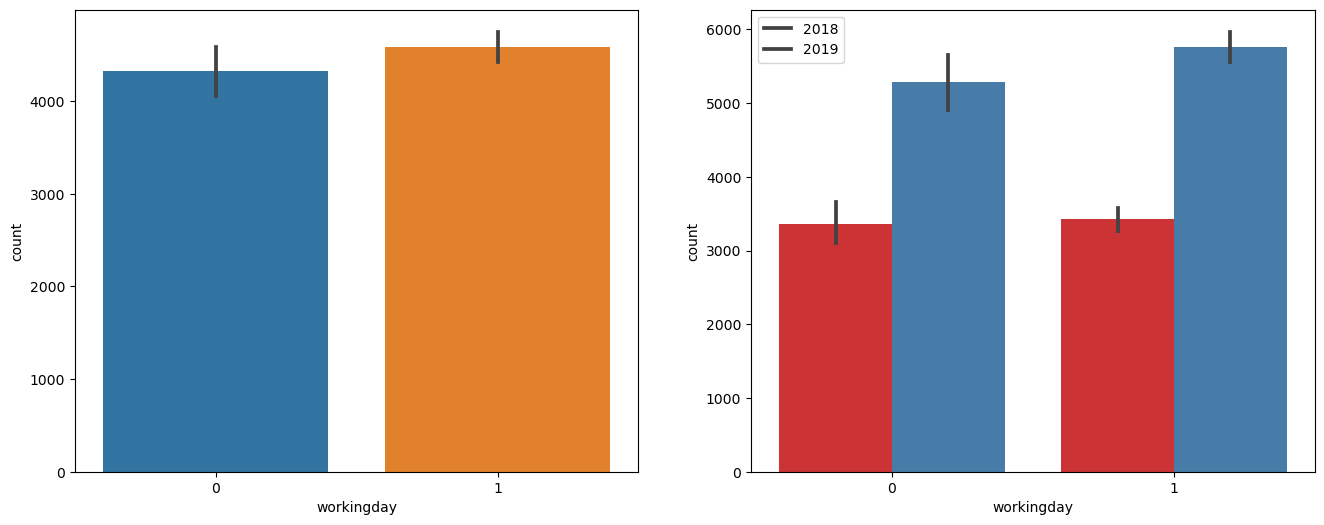

In [24]:
plot_categorical_columns('workingday')

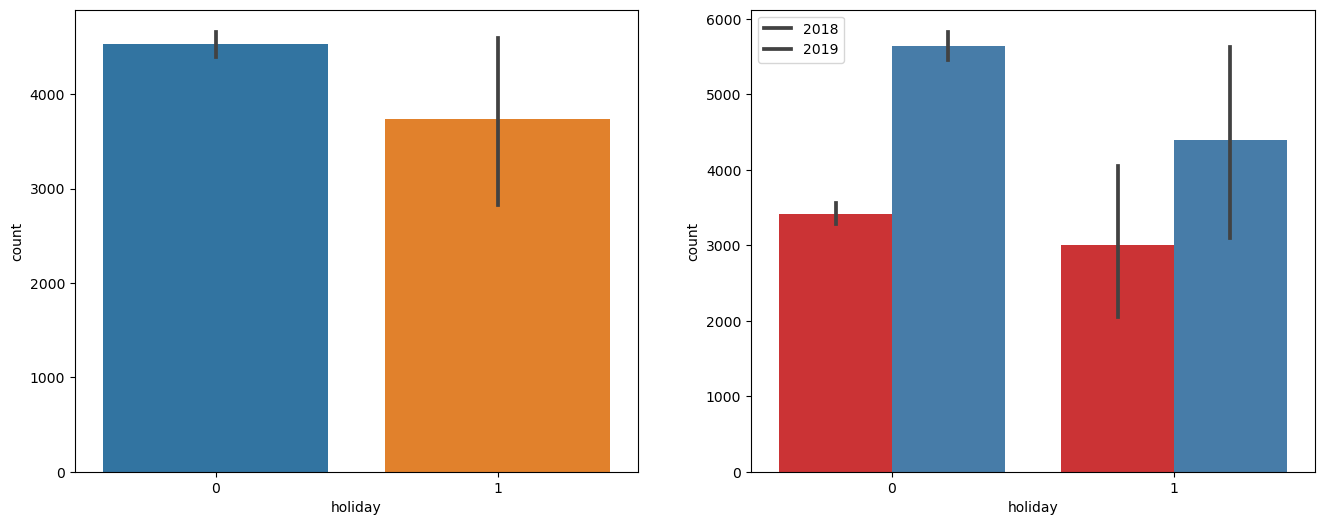

In [25]:
plot_categorical_columns('holiday')

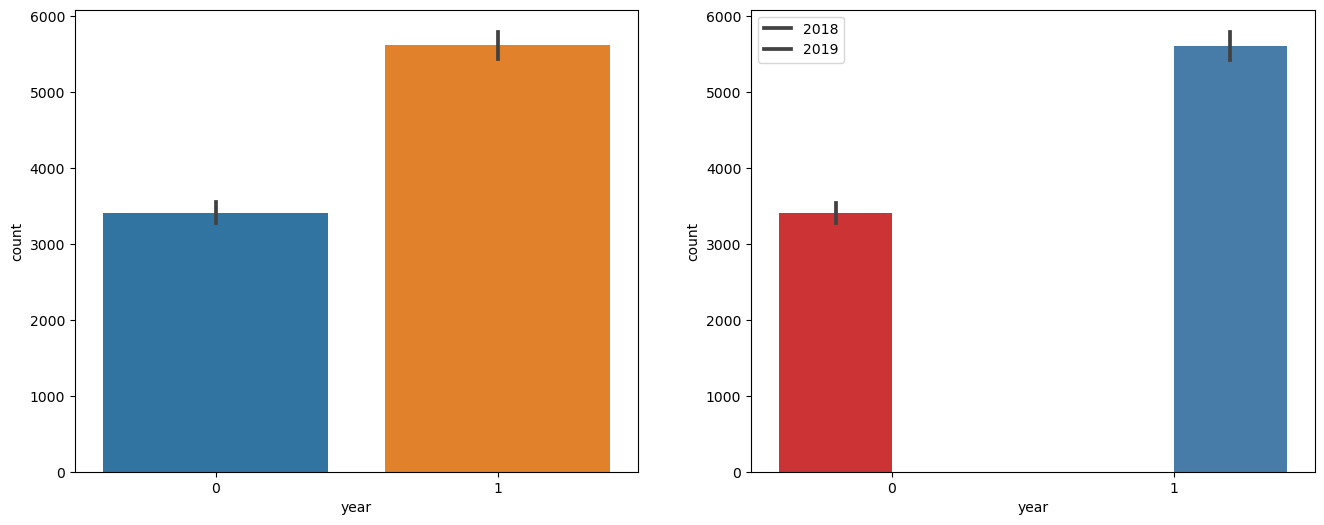

In [26]:
plot_categorical_columns('year')

Insights from categorical variables:
1. fall season has more number of bookings. bookings are drastically increasing from year to year.
2. Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.
3. In clear weather, more number of bikes booked. and it's increasing from 2019 to 2019.
4. Thu, Fri, Sat have more number of bookings as compared to the start of the week.

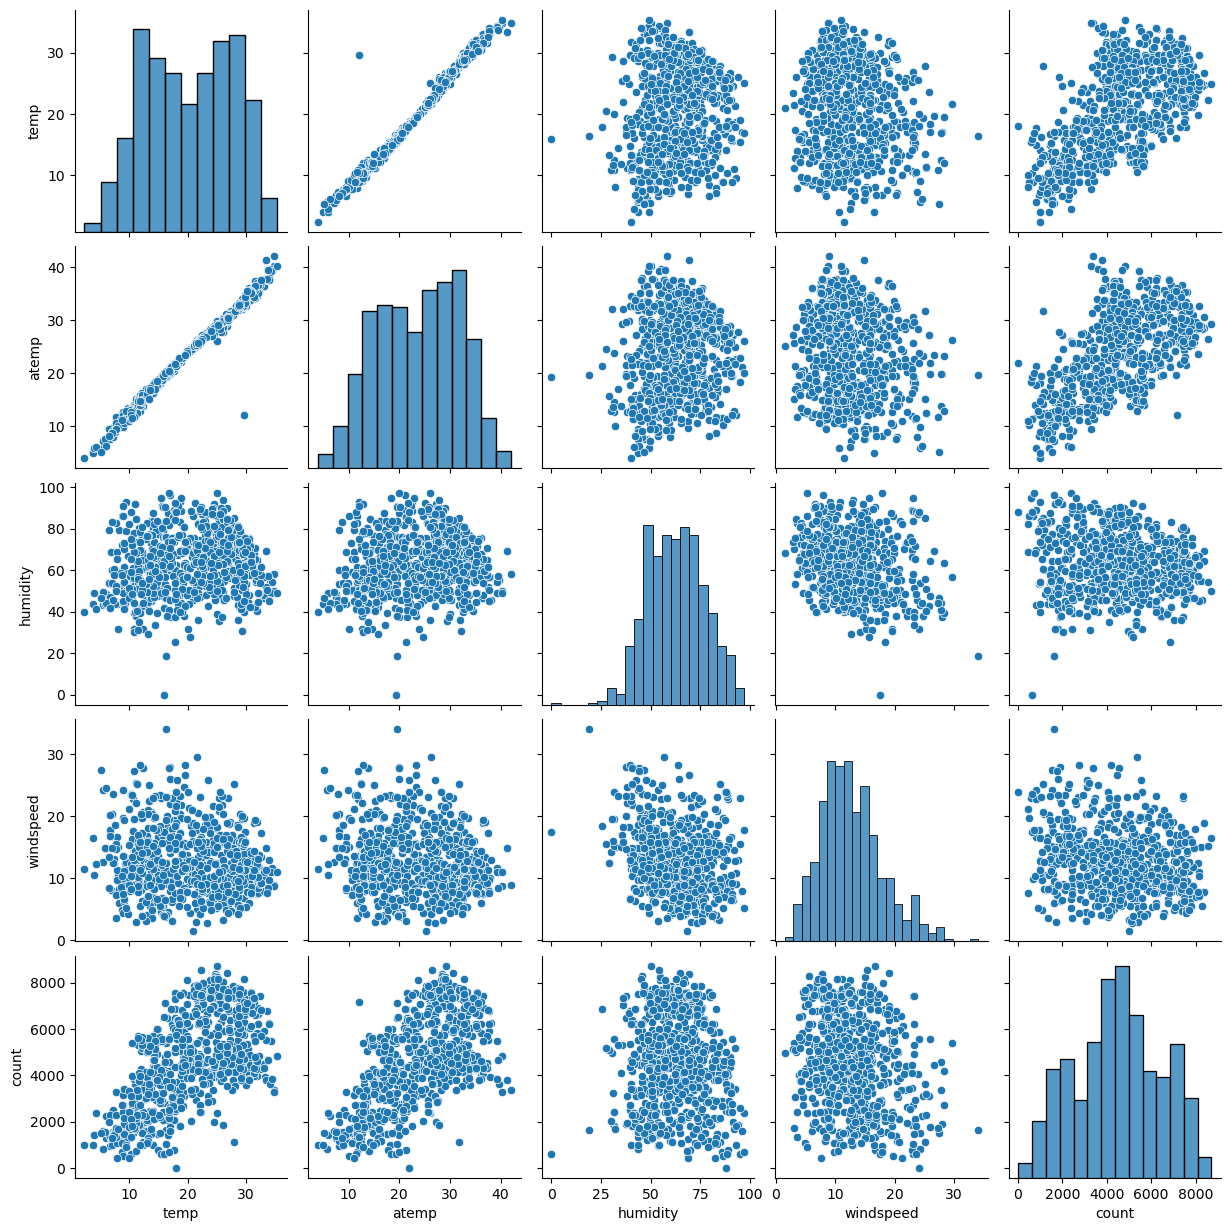

In [27]:
# for numeric variables

sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

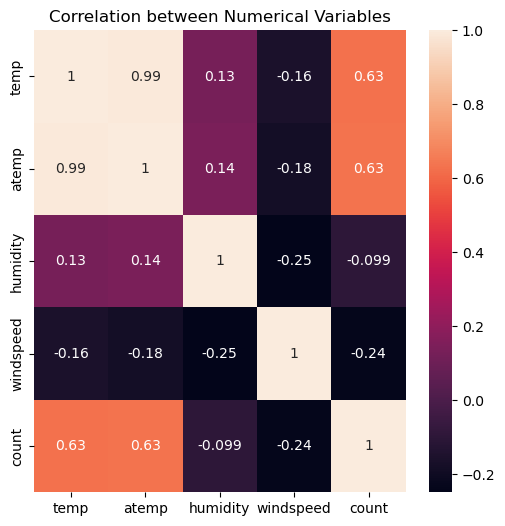

In [28]:
# correlation matrix

plt.figure(figsize = (6,6))
sns.heatmap(bike[['temp','atemp','humidity','windspeed','count']].corr(), annot = True)
plt.title("Correlation between Numerical Variables")
plt.show()

## Step-2: Data Preparation

In [29]:
#creating dummy variables
months_df=pd.get_dummies(bike.month,drop_first=True).astype(int)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True).astype(int)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True).astype(int)
seasons_df=pd.get_dummies(bike.season,drop_first=True).astype(int)

In [30]:
bike

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,saturday,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thursday,1,misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,friday,1,misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,saturday,0,misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sunday,0,clear,10.489153,11.58500,48.3333,23.500518,1796


In [31]:
#concat dummy with original dataframe
bike= pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [32]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
0,spring,0,jan,0,saturday,0,misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sunday,0,misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [33]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
 12  aug             730 non-null    int32  
 13  dec             730 non-null    int32  
 14  feb             730 non-null    int32  
 15  jan             730 non-null    int32  
 16  july            730 non-null    int32  
 17  june            730 non-null    int

In [34]:
# dropping columns which already created dummy vars columns.

bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [35]:
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   count           730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

## Step-3: Splitting the train and test dataset 

In [37]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [38]:
print('df_train shape:',df_train.shape)
print('df_test shape:',df_test.shape)

df_train shape: (510, 30)
df_test shape: (220, 30)


### Rescaling the features

In [39]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [40]:
# performing scaling on all the numericals variables of train dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,1,0,...,0,0,1,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,0,0,...,0,0,0,0,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,1,...,1,0,0,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0.236424,0,0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


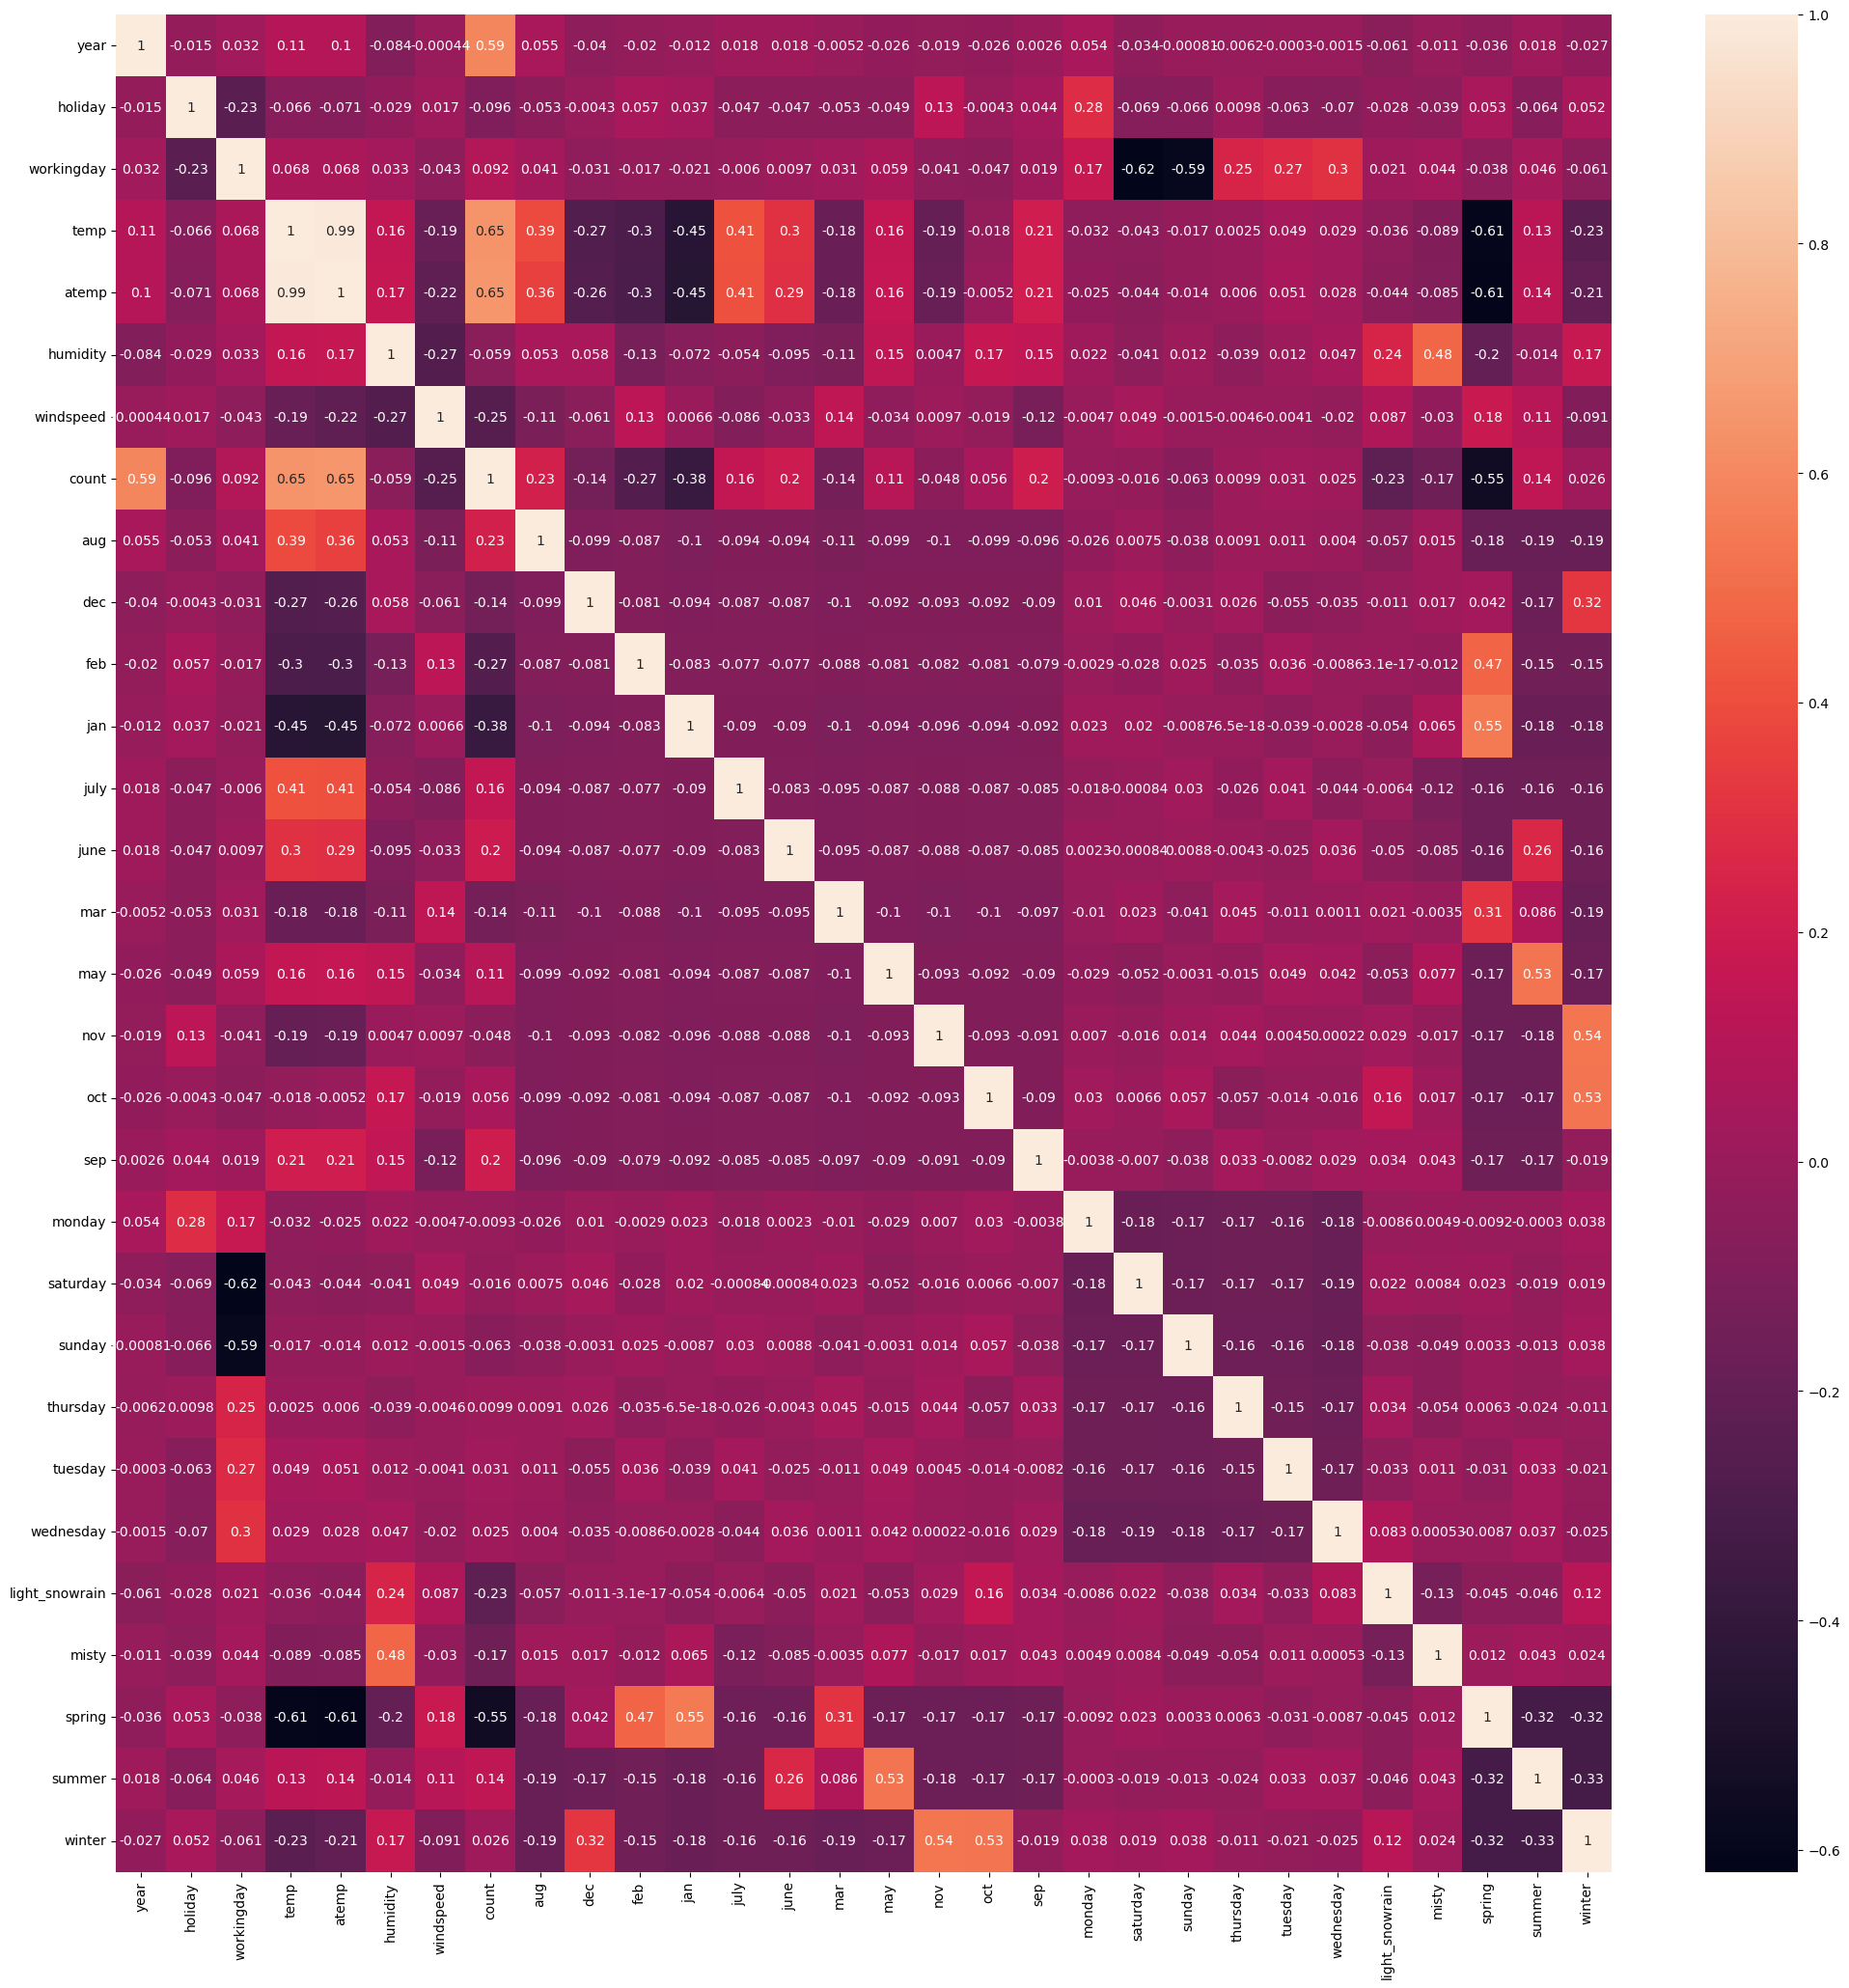

In [43]:
#check the correlation matrix
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

Insights from correlation:
1. count variable seems to be correlated with temp and year.
2. In correlation matrix, we can able to see the variables having multicolinearity in nature.

## Step-4: Building the model

In [44]:
y_train=df_train.pop('count')
X_train=df_train

In [45]:
# RFE(Recursive feature elimination) 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 12),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [47]:
col=X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'saturday', 'light_snowrain', 'misty', 'spring',
       'summer', 'winter'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct',
       'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [49]:
X_train_rfe=X_train[col]

In [50]:
# function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

## Step-5: Building the model

<b>Model-1</b>

In [51]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

In [52]:
lr_1.params

const             0.251893
year              0.230527
holiday          -0.058173
workingday        0.043335
temp              0.509619
humidity         -0.156299
windspeed        -0.186259
jan              -0.034512
july             -0.052918
sep               0.081395
saturday          0.053552
light_snowrain   -0.247464
misty            -0.056318
spring           -0.050897
summer            0.050762
winter            0.093301
dtype: float64

In [53]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        20:10:07   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.969      0.000       0.181       0.323
year               0.2305      0.008     28.795      0.000       0.215       0.246
holiday           -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday         0.0433      0.012      3.762      0.000       0.021       0.066
temp               0.5096      0.034     14.837      0.000       0.442       0.577
humidity          -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed         -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan               -0.0345      0.017     -1.989      0.047      -0.069      -0.000
july              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                0.0814      0.016      4.945      0.000       0.049       0.114
saturday           0.0536      0.014      3.694      0.000       0.025       0.082
light_snowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
misty             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer             0.0508      0.015      3.423      0.001       0.022       0.080
winter             0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,misty,2.29
0,year,2.09
9,saturday,1.98


Humidity has high VIF value.It has p value<0.05. we will drop this feature.

<b>Model-2</b>

In [55]:
X_train_rfe2 = X_train_rfe.drop('humidity', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.60e-188
Time:                        20:10:22   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.520      0.000       0.112       0.235
year               0.2345      0.008     29.009      0.000       0.219       0.250
holiday           -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday         0.0464      0.012      3.966      0.000       0.023       0.069
temp               0.4722      0.034     14.005      0.000       0.406       0.538
windspeed         -0.1563      0.025     -6.286      0.000      -0.205      -0.107
jan               -0.0392      0.018     -2.227      0.026      -0.074      -0.005
july              -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep                0.0755      0.017      4.527      0.000       0.043       0.108
saturday           0.0583      0.015      3.968      0.000       0.029       0.087
light_snowrain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
misty             -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring            -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer             0.0445      0.015      2.967      0.003       0.015       0.074
winter             0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
calculateVIF(X_train_rfe2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,saturday,1.97
5,jan,1.62
6,july,1.59


Here, working day has high VIF value>5 we need to drop this feature.

<b>Model-3</b>

In [57]:
X_train_rfe3 = X_train_rfe2.drop('workingday', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.48e-186
Time:                        20:10:28   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2120      0.030      6.978      0.000       0.152       0.272
year               0.2347      0.008     28.620      0.000       0.219       0.251
holiday           -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp               0.4734      0.034     13.837      0.000       0.406       0.541
windspeed         -0.1570      0.025     -6.226      0.000      -0.207      -0.107
jan               -0.0386      0.018     -2.159      0.031      -0.074      -0.003
july              -0.0508      0.019     -2.735      0.006      -0.087      -0.014
sep                0.0762      0.017      4.504      0.000       0.043       0.109
saturday           0.0201      0.011      1.787      0.075      -0.002       0.042
light_snowrain    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
misty             -0.0794      0.009     -9.097      0.000      -0.097      -0.062
spring            -0.0615      0.021     -2.902      0.004      -0.103      -0.020
summer             0.0437      0.015      2.871      0.004       0.014       0.074
winter             0.0755      0.017      4.334      0.000       0.041       0.110
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
calculateVIF(X_train_rfe3)

,Features,VIF
2,temp,5.16
3,windspeed,4.64
10,spring,2.76
11,summer,2.24
0,year,2.07
12,winter,1.80
4,jan,1.61
5,july,1.59
9,misty,1.56
6,sep,1.34


removing feature - saturday beacuse of high p-values(0.075).

<b>Model-4</b>

In [59]:
X_train_rfe4 = X_train_rfe3.drop('saturday', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          8.14e-187
Time:                        20:10:33   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.088      0.000       0.156       0.275
year               0.2343      0.008     28.517      0.000       0.218       0.250
holiday           -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp               0.4721      0.034     13.772      0.000       0.405       0.539
windspeed         -0.1549      0.025     -6.135      0.000      -0.205      -0.105
jan               -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                0.0764      0.017      4.506      0.000       0.043       0.110
light_snowrain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
misty             -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring            -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer             0.0434      0.015      2.845      0.005       0.013       0.073
winter             0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,misty,1.56
6,sep,1.34


removing feature - 'spring' because of high negative collinearity with temp variable.

<b>Model-5</b>

In [61]:
X_train_rfe5 = X_train_rfe4.drop('spring', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.5
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          3.40e-186
Time:                        20:10:43   Log-Likelihood:                 496.84
No. Observations:                 510   AIC:                            -969.7
Df Residuals:                     498   BIC:                            -918.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1478      0.020      7.502      0.000       0.109       0.187
year               0.2332      0.008     28.203      0.000       0.217       0.249
holiday           -0.0989      0.026     -3.778      0.000      -0.150      -0.047
temp               0.5404      0.025     21.481      0.000       0.491       0.590
windspeed         -0.1615      0.025     -6.375      0.000      -0.211      -0.112
jan               -0.0445      0.018     -2.488      0.013      -0.080      -0.009
july              -0.0394      0.018     -2.145      0.032      -0.075      -0.003
sep                0.0900      0.016      5.480      0.000       0.058       0.122
light_snowrain    -0.2835      0.025    -11.417      0.000      -0.332      -0.235
misty             -0.0785      0.009     -8.911      0.000      -0.096      -0.061
summer             0.0735      0.011      6.516      0.000       0.051       0.096
winter             0.1140      0.011      9.916      0.000       0.091       0.137
==============================================================================
Omnibus:                       52.948   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.196
Skew:                          -0.610   Prob(JB):                     1.44e-23
Kurtosis:                       4.861   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
calculateVIF(X_train_rfe5)

,Features,VIF
2,temp,5.13
3,windspeed,3.34
0,year,2.04
9,summer,1.82
8,misty,1.54
5,july,1.52
10,winter,1.50
6,sep,1.29
4,jan,1.22
7,light_snowrain,1.08


removing feature - 'July' coz of high collinearity with temp variable.

<b>Model-6</b>

In [63]:
X_train_rfe6 = X_train_rfe5.drop('july', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.06e-186
Time:                        20:10:47   Log-Likelihood:                 494.49
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     499   BIC:                            -920.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1522      0.020      7.737      0.000       0.114       0.191
year               0.2338      0.008     28.198      0.000       0.218       0.250
holiday           -0.0976      0.026     -3.717      0.000      -0.149      -0.046
temp               0.5186      0.023     22.453      0.000       0.473       0.564
windspeed         -0.1610      0.025     -6.331      0.000      -0.211      -0.111
jan               -0.0453      0.018     -2.520      0.012      -0.081      -0.010
sep                0.0990      0.016      6.217      0.000       0.068       0.130
light_snowrain    -0.2845      0.025    -11.418      0.000      -0.333      -0.236
misty             -0.0774      0.009     -8.775      0.000      -0.095      -0.060
summer             0.0810      0.011      7.527      0.000       0.060       0.102
winter             0.1179      0.011     10.340      0.000       0.095       0.140
==============================================================================
Omnibus:                       57.673   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.516
Skew:                          -0.652   Prob(JB):                     5.00e-26
Kurtosis:                       4.944   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
calculateVIF(X_train_rfe6)

,Features,VIF
2,temp,3.77
3,windspeed,3.31
0,year,2.04
8,summer,1.62
7,misty,1.53
9,winter,1.42
4,jan,1.21
5,sep,1.21
6,light_snowrain,1.08
1,holiday,1.04


In [65]:
X_train_rfe7 = X_train_rfe6.drop('jan', axis = 1)

# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.83e-186
Time:                        20:10:49   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.508      0.000       0.093       0.159
year               0.2329      0.008     27.962      0.000       0.216       0.249
holiday           -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp               0.5480      0.020     27.360      0.000       0.509       0.587
windspeed         -0.1532      0.025     -6.039      0.000      -0.203      -0.103
sep                0.1012      0.016      6.330      0.000       0.070       0.133
light_snowrain    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
misty             -0.0784      0.009     -8.844      0.000      -0.096      -0.061
summer             0.0881      0.010      8.437      0.000       0.068       0.109
winter             0.1293      0.011     12.314      0.000       0.109       0.150
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
calculateVIF(X_train_rfe7)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,year,2.00
7,summer,1.57
6,misty,1.48
8,winter,1.37
4,sep,1.20
5,light_snowrain,1.08
1,holiday,1.04


In [67]:
lr7.params

const             0.125926
year              0.232861
holiday          -0.098685
temp              0.548008
windspeed        -0.153246
sep               0.101195
light_snowrain   -0.282869
misty            -0.078375
summer            0.088080
winter            0.129345
dtype: float64

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

**F Statistics** : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 271.9
- Prob (F-statistic): 2.83e-186

**The F-Statistics value of 271.9 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**

### The equation for best fitted line based on Model 7:


$Count = 0.125926 + (temp * 0.5480) - (windspeed * 0.1532) + (summer * 0.0880) + (winter * 0.1293) + (year * 0.2328) + (sep* 0.1011) - (holiday * 0.09868) - (misty * 0.07837) - (light_snowrain * 0.2828)$

<b>VALIDATE ASSUMPTIONS
- Error terms are normally distributed with mean zero (not X, Y)
</b>

### - Residual Analysis

In [68]:
y_train_pred = lr7.predict(X_train_lm7)

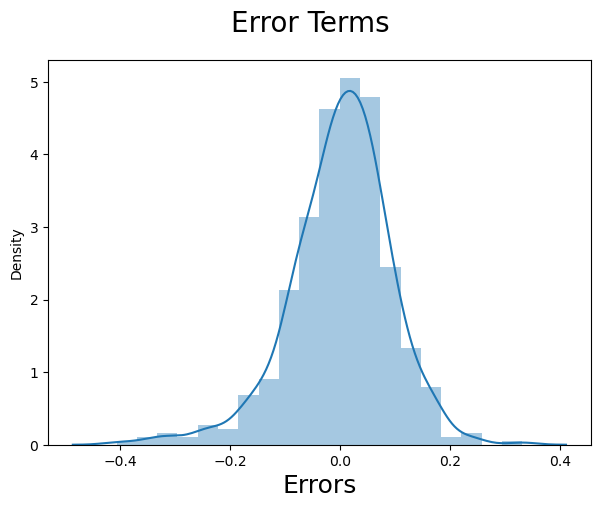

In [69]:
# residuals
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Homoscedasticity

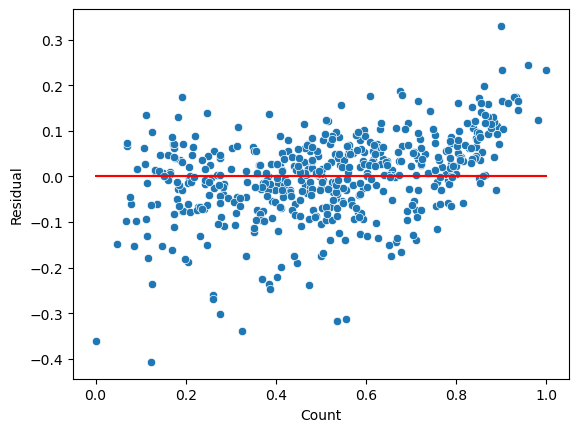

In [70]:
y_train_pred = lr7.predict(X_train_lm7)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- No visible pattern observed in above scatter plot of residuals

## Step-6: Making predictions using final model

In [71]:

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [72]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
y_test = df_test.pop('count')
X_test = df_test

In [74]:
#Selecting the variables that were part of final model (Model 6).
col_test = X_train_rfe7.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.head()

,const,year,holiday,temp,windspeed,sep,light_snowrain,misty,summer,winter
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,1,0


In [75]:
y_test_pred = lr7.predict(X_test_lm6)

In [76]:
r2 = r2_score(y_test, y_test_pred)
r2

0.7941977535477243

In [77]:
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',r2_test)
print('Train data r^2 :',r2_train)

Test data r^2 : 0.7941977535477243
Train data r^2 : 0.8303450237489229


### Model Evaluation

Text(0, 0.5, 'y_test_pred')

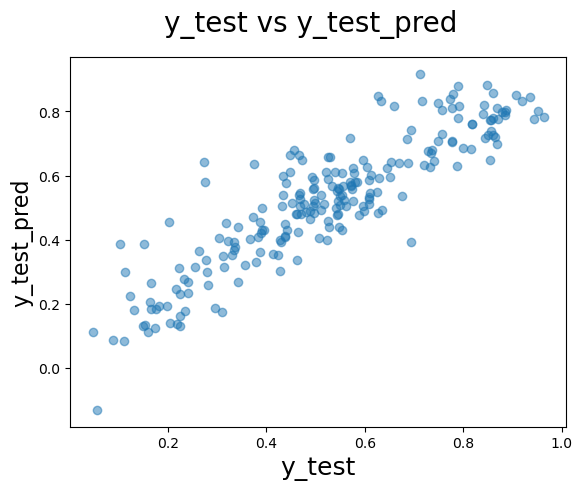

In [78]:

# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                  
plt.ylabel('y_test_pred', fontsize = 16) 

**We can see there is linear relationship between y_test and y_test_pred**

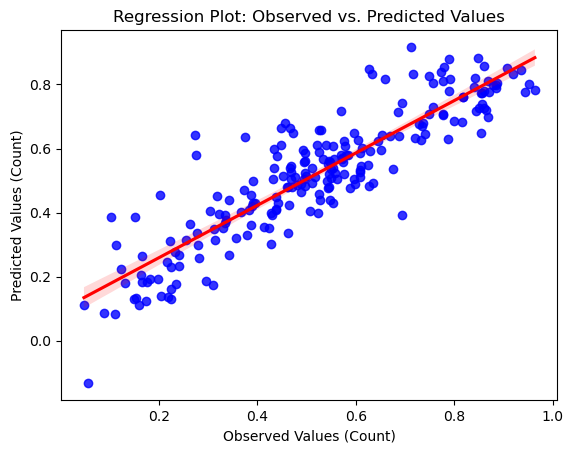

In [79]:


# Plotting regression plot
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Observed Values (Count)')
plt.ylabel('Predicted Values (Count)')
plt.title('Regression Plot: Observed vs. Predicted Values')
plt.show()

In [80]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print('test adjusted r2_score',adjusted_r2)

test adjusted r2_score 0.7854


## Final Observations:

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.8303
- Test dataset R^2           : 0.7941
- Train dataset Adjusted R^2 : 0.8270 
- Test dataset Adjusted R^2  : 0.7854


As per our final Model, the below predictor variables influences bike booking :
Demand of bikes depend on year, holiday, temp, windspeed, sept month, Light_snowrain, Misty, summer and winter.
